# Data Cleaning

In [7]:
import pandas as pd
import numpy as np
from transformers import BertModel, BertTokenizer
from datasets import tqdm
import torch
from torch.utils.data import TensorDataset, DataLoader

In [9]:
path = 'reddit_mental_health.csv'

# data overview
df = pd.read_csv(path)
df

,Unnamed: 0,text,title,target
0,0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1
...,...,...,...,...
5952,1183,I’ve (24M) dealt with depression/anxiety for y...,Nobody takes me seriously,4
5953,1184,"""I don't feel very good, it's like I don't be...",selfishness,4
5954,1185,"I can't sleep most of the nights, meds didn't ...",Is there any way to sleep better?,4
5955,1186,"Hi, all. I have to give a presentation at work...",Public speaking tips?,4


In [10]:
# drop the rows with missing values
df1 = df.dropna()
df1

,Unnamed: 0,text,title,target
0,0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1
...,...,...,...,...
5952,1183,I’ve (24M) dealt with depression/anxiety for y...,Nobody takes me seriously,4
5953,1184,"""I don't feel very good, it's like I don't be...",selfishness,4
5954,1185,"I can't sleep most of the nights, meds didn't ...",Is there any way to sleep better?,4
5955,1186,"Hi, all. I have to give a presentation at work...",Public speaking tips?,4


In [11]:
# drop the 'row number' column since it's just an identifier
df2 = df1.drop(df1.columns[0], axis=1)
df2

# also note that we have a pretty balanced dataset!

,text,title,target
0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1
...,...,...,...
5952,I’ve (24M) dealt with depression/anxiety for y...,Nobody takes me seriously,4
5953,"""I don't feel very good, it's like I don't be...",selfishness,4
5954,"I can't sleep most of the nights, meds didn't ...",Is there any way to sleep better?,4
5955,"Hi, all. I have to give a presentation at work...",Public speaking tips?,4


In [12]:
# check if the datatypes are correct
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5607 entries, 0 to 5956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5607 non-null   object
 1   title   5607 non-null   object
 2   target  5607 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 175.2+ KB


In [13]:
# change "title" and "text" columns to string datatype
df3 = df2.copy()
df3["title"] = df2["title"].astype("string")
df3["text"] = df2["text"].astype("string")

df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5607 entries, 0 to 5956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5607 non-null   string
 1   title   5607 non-null   string
 2   target  5607 non-null   int64 
dtypes: int64(1), string(2)
memory usage: 175.2 KB


# LDA and Topic Modeling - (LILIANA)

In [14]:
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

def preprocess(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]  # Remove stopwords & non-alpha words
    return tokens

# Apply preprocessing
df3['processed_text'] = df3['text'].apply(preprocess)

# Create dictionary and corpus
dictionary = corpora.Dictionary(df3['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df3['processed_text']]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Display topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lilia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lilia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.020*"im" + 0.019*"like" + 0.016*"feel" + 0.012*"get" + 0.009*"know" + 0.008*"dont" + 0.008*"even" + 0.008*"time" + 0.007*"really" + 0.007*"ive"')
(1, '0.021*"like" + 0.019*"people" + 0.015*"feel" + 0.014*"im" + 0.010*"know" + 0.009*"dont" + 0.008*"even" + 0.008*"think" + 0.007*"really" + 0.007*"one"')
(2, '0.014*"stress" + 0.007*"anxiety" + 0.006*"time" + 0.004*"help" + 0.004*"take" + 0.004*"breathing" + 0.004*"life" + 0.004*"like" + 0.004*"experience" + 0.003*"feeling"')
(3, '0.011*"like" + 0.008*"would" + 0.008*"want" + 0.007*"said" + 0.007*"even" + 0.007*"time" + 0.007*"know" + 0.007*"never" + 0.006*"life" + 0.006*"im"')
(4, '0.018*"anxiety" + 0.008*"take" + 0.007*"bipolar" + 0.006*"anyone" + 0.006*"meds" + 0.006*"get" + 0.005*"started" + 0.005*"taking" + 0.005*"back" + 0.005*"symptoms"')


In [15]:
# Assign dominant topic to each document
def get_dominant_topic(lda_model, corpus):
    topics = []
    for row in lda_model[corpus]:  # Get topic distribution for each document
        dominant_topic = sorted(row, key=lambda x: x[1], reverse=True)[0][0]  # Get topic with highest probability
        topics.append(dominant_topic)
    return topics

# Get dominant topics
df3['dominant_topic'] = get_dominant_topic(lda_model, corpus)

# Define topic labels
topic_labels = {
    0: "Personal Feelings & Emotional States",
    1: "Social Interactions & Relationships",
    2: "Stress & Anxiety Management",
    3: "Life Decisions & Uncertainty",
    4: "Mental Health & Medication"
}

# Assign topic names
df3['topic_name'] = df3['dominant_topic'].map(topic_labels)

df3

,text,title,target,processed_text,dominant_topic,topic_name
0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1,"[welcome, rdepressions, checkin, post, place, ...",1,Social Interactions & Relationships
1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1,"[understand, people, reply, immediately, op, i...",1,Social Interactions & Relationships
2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1,"[anyone, else, miss, physical, touch, crave]",1,Social Interactions & Relationships
3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1,"[ashamed, everyone, everything, feels, far, aw...",0,Personal Feelings & Emotional States
4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1,"[really, need, friend, dont, even, single, bes...",1,Social Interactions & Relationships
...,...,...,...,...,...,...
5952,I’ve (24M) dealt with depression/anxiety for y...,Nobody takes me seriously,4,"[dealt, depressionanxiety, years, used, great,...",0,Personal Feelings & Emotional States
5953,"""I don't feel very good, it's like I don't be...",selfishness,4,"[dont, feel, good, like, dont, belong, world, ...",3,Life Decisions & Uncertainty
5954,"I can't sleep most of the nights, meds didn't ...",Is there any way to sleep better?,4,"[cant, sleep, nights, meds, didnt, help]",0,Personal Feelings & Emotional States
5955,"Hi, all. I have to give a presentation at work...",Public speaking tips?,4,"[hi, give, presentation, work, next, week, min...",0,Personal Feelings & Emotional States


In [16]:
# combine "title" and "text" into one column called "combined_text"
df4 = df3.copy()
df4["combined_text"] = df3["title"] + " " + df3["text"]
df4.drop(columns=["title", "text"], inplace=True)
df4

,target,processed_text,dominant_topic,topic_name,combined_text
0,1,"[welcome, rdepressions, checkin, post, place, ...",1,Social Interactions & Relationships,"Regular check-in post, with information about ..."
1,1,"[understand, people, reply, immediately, op, i...",1,Social Interactions & Relationships,Our most-broken and least-understood rules is ...
2,1,"[anyone, else, miss, physical, touch, crave]",1,Social Interactions & Relationships,"I haven’t been touched, or even hugged, in so ..."
3,1,"[ashamed, everyone, everything, feels, far, aw...",0,Personal Feelings & Emotional States,Being Depressed is Embarrassing I’m just so as...
4,1,"[really, need, friend, dont, even, single, bes...",1,Social Interactions & Relationships,I'm desperate for a friend and to feel loved b...
...,...,...,...,...,...
5952,4,"[dealt, depressionanxiety, years, used, great,...",0,Personal Feelings & Emotional States,Nobody takes me seriously I’ve (24M) dealt wit...
5953,4,"[dont, feel, good, like, dont, belong, world, ...",3,Life Decisions & Uncertainty,"selfishness ""I don't feel very good, it's lik..."
5954,4,"[cant, sleep, nights, meds, didnt, help]",0,Personal Feelings & Emotional States,Is there any way to sleep better? I can't slee...
5955,4,"[hi, give, presentation, work, next, week, min...",0,Personal Feelings & Emotional States,"Public speaking tips? Hi, all. I have to give ..."


<Figure size 1200x600 with 0 Axes>

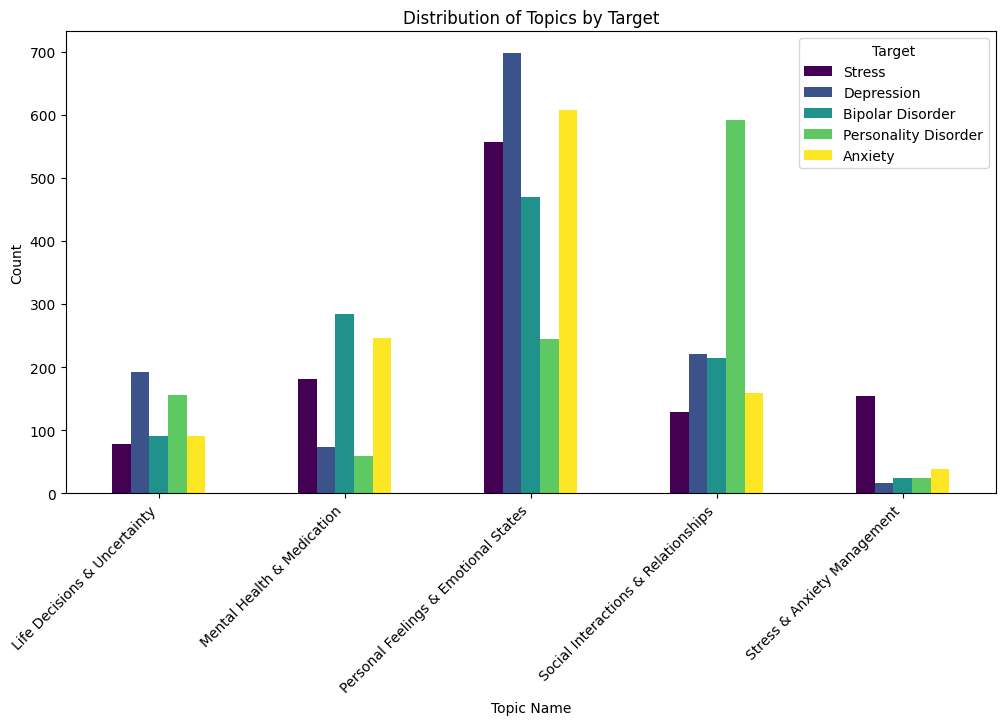

In [20]:
# Plot the bar chart with separate bars for each target
import matplotlib.pyplot as plt

# Define target labels
target_labels = {
    0: "Stress",
    1: "Depression",
    2: "Bipolar Disorder",
    3: "Personality Disorder",
    4: "Anxiety"
}

# Group by topic and target
topic_target_counts = df4.groupby(['topic_name', 'target']).size().unstack()

# Rename legend labels
topic_target_counts.rename(columns=target_labels, inplace=True)

plt.figure(figsize=(12, 6))
topic_target_counts.plot(kind='bar', colormap='viridis', figsize=(12,6))

# Customize labels and title
plt.xlabel("Topic Name")
plt.ylabel("Count")
plt.title("Distribution of Topics by Target")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Target")

# Show plot
plt.show()

# BERT Embeddings

In [8]:
# Load the pre-trained BERT tokenizer and model.
# We use BertModel (without a classification head) for feature extraction.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()  # Set the model to evaluation mode to ensure that dropout and other training-specific layers are deactivated

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [9]:
# Parameters for tokenization
max_length = 256  # Adjust as needed
batch_size = 8   # Adjust batch size based on your hardware

# Tokenize all texts
texts = df4["combined_text"].tolist()
labels = df4["target"].tolist()

# Tokenize with padding and truncation. Setting return_tensors="pt" to get PyTorch tensors.
encoded_inputs = tokenizer(texts,
                           padding=True,
                           truncation=True,
                           max_length=max_length,
                           return_tensors='pt')

In [10]:
# Create a PyTorch dataset and DataLoader for batching.
dataset = TensorDataset(encoded_inputs['input_ids'],
                        encoded_inputs['attention_mask'],
                        torch.tensor(labels))
dataloader = DataLoader(dataset, batch_size=batch_size)

# Initialize a list to hold embeddings and corresponding labels.
all_embeddings = []
all_labels = []

# Disable gradient calculation for inference.
with torch.no_grad():
    for batch in tqdm(dataloader, desc="Generating BERT Embeddings"):
        input_ids, attention_mask, batch_labels = batch

        # Get model outputs. outputs.last_hidden_state has shape (batch_size, sequence_length, hidden_size)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        # Extract the embedding corresponding to the [CLS] token (first token)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # shape: (batch_size, hidden_size)

        # Append to our list (move to CPU and convert to numpy array)
        all_embeddings.append(cls_embeddings.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

# Stack all embeddings into a single NumPy array.
X = np.vstack(all_embeddings)  # Shape: (num_samples, hidden_size)
y = np.array(all_labels)


Generating BERT Embeddings:   0%|          | 0/351 [00:00<?, ?it/s]

In [11]:
# make sure X has the right shape
X.shape

(5607, 768)

In [12]:
# make sure y has the right shape
y.shape

(5607,)

# Classifier

## JUST AN LOGISTIC REGRESSION EXAMPLE - MAGGIE

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a logistic regression classifier (or choose any other classifier)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.64349376114082
